In [1]:
import pandas as pd
import numpy as np
import os
import glob
# Change “/mydir” to your desired working directory.
os.chdir("./Desktop/Insight Project/Data/retail_all")

In [2]:
# Use glob to match the pattern ‘csv’
# Match the pattern (‘csv’) and save the list of file names in the ‘all_filenames’ variable.
extension = 'csv'
all_filenames = [i for i in glob.glob('retail_all_*.{}'.format(extension))]

In [3]:
# Combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# Export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [4]:
df = pd.read_csv("combined_csv.csv") #Reading the dataset in a dataframe using Pandas

In [5]:
df.head()

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,10/5/2007,NATIONAL,FRUITS,APPLES,RED DELICIOUS,NaN,NaN,per pound,"4,985",0.99,NaN,NaN,NaN
1,10/5/2007,NATIONAL,FRUITS,AVOCADOS,HASS,NaN,NaN,each,"3,286",1.18,NaN,NaN,NaN
2,10/5/2007,NATIONAL,FRUITS,BANANAS,NaN,NaN,NaN,per pound,"1,761",0.44,NaN,NaN,NaN
3,10/5/2007,NATIONAL,FRUITS,BANANAS,NaN,Y,NaN,per pound,81,0.95,NaN,NaN,NaN
4,10/5/2007,NATIONAL,FRUITS,BLUEBERRIES,NaN,NaN,NaN,4.4 oz package,460,2.99,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C90701320>,
      dtype=object)

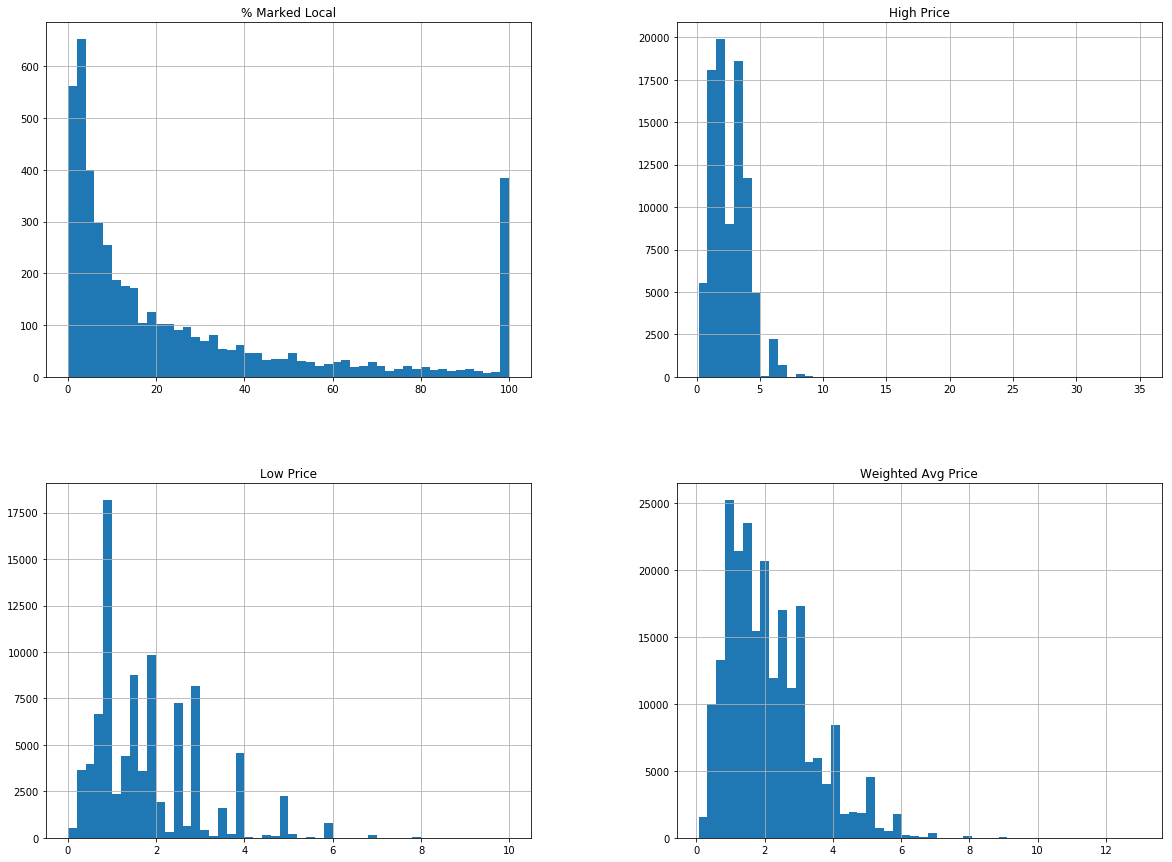

In [6]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [7]:
df['Date'] = pd.to_datetime(df.Date)
df.head()

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,2007-10-05,NATIONAL,FRUITS,APPLES,RED DELICIOUS,NaN,NaN,per pound,"4,985",0.99,NaN,NaN,NaN
1,2007-10-05,NATIONAL,FRUITS,AVOCADOS,HASS,NaN,NaN,each,"3,286",1.18,NaN,NaN,NaN
2,2007-10-05,NATIONAL,FRUITS,BANANAS,NaN,NaN,NaN,per pound,"1,761",0.44,NaN,NaN,NaN
3,2007-10-05,NATIONAL,FRUITS,BANANAS,NaN,Y,NaN,per pound,81,0.95,NaN,NaN,NaN
4,2007-10-05,NATIONAL,FRUITS,BLUEBERRIES,NaN,NaN,NaN,4.4 oz package,460,2.99,NaN,NaN,NaN


In [8]:
from datetime import datetime
dateparse0 = lambda dates: [pd.datetime.strptime(d, '%Y-%m-%d') for d in dates]
df.index = df["Date"]
del df["Date"]
df.head()

,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
Date,,,,,,,,,,,,
2007-10-05,NATIONAL,FRUITS,APPLES,RED DELICIOUS,NaN,NaN,per pound,"4,985",0.99,NaN,NaN,NaN
2007-10-05,NATIONAL,FRUITS,AVOCADOS,HASS,NaN,NaN,each,"3,286",1.18,NaN,NaN,NaN
2007-10-05,NATIONAL,FRUITS,BANANAS,NaN,NaN,NaN,per pound,"1,761",0.44,NaN,NaN,NaN
2007-10-05,NATIONAL,FRUITS,BANANAS,NaN,Y,NaN,per pound,81,0.95,NaN,NaN,NaN
2007-10-05,NATIONAL,FRUITS,BLUEBERRIES,NaN,NaN,NaN,4.4 oz package,460,2.99,NaN,NaN,NaN


In [9]:
# Date will become a normal column and you can rename it.
df = df.reset_index()
df.head()

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,2007-10-05,NATIONAL,FRUITS,APPLES,RED DELICIOUS,NaN,NaN,per pound,"4,985",0.99,NaN,NaN,NaN
1,2007-10-05,NATIONAL,FRUITS,AVOCADOS,HASS,NaN,NaN,each,"3,286",1.18,NaN,NaN,NaN
2,2007-10-05,NATIONAL,FRUITS,BANANAS,NaN,NaN,NaN,per pound,"1,761",0.44,NaN,NaN,NaN
3,2007-10-05,NATIONAL,FRUITS,BANANAS,NaN,Y,NaN,per pound,81,0.95,NaN,NaN,NaN
4,2007-10-05,NATIONAL,FRUITS,BLUEBERRIES,NaN,NaN,NaN,4.4 oz package,460,2.99,NaN,NaN,NaN


In [10]:
# Fill Null values
null_values = {'Variety': "NONE", 'Organic': "N"}
df = df.fillna(value=null_values)
df.head(50)

,Date,Region,Class,Commodity,Variety,Organic,Environment,Unit,Number of Stores,Weighted Avg Price,Low Price,High Price,% Marked Local
0,2007-10-05,NATIONAL,FRUITS,APPLES,RED DELICIOUS,N,NaN,per pound,"4,985",0.99,NaN,NaN,NaN
1,2007-10-05,NATIONAL,FRUITS,AVOCADOS,HASS,N,NaN,each,"3,286",1.18,NaN,NaN,NaN
2,2007-10-05,NATIONAL,FRUITS,BANANAS,NONE,N,NaN,per pound,"1,761",0.44,NaN,NaN,NaN
3,2007-10-05,NATIONAL,FRUITS,BANANAS,NONE,Y,NaN,per pound,81,0.95,NaN,NaN,NaN
4,2007-10-05,NATIONAL,FRUITS,BLUEBERRIES,NONE,N,NaN,4.4 oz package,460,2.99,NaN,NaN,NaN
5,2007-10-05,NATIONAL,FRUITS,CANTALOUPS,NONE,N,NaN,each,"2,906",2.11,NaN,NaN,NaN
6,2007-10-05,NATIONAL,FRUITS,GRAPEFRUIT,RED,N,NaN,each,383,0.94,NaN,NaN,NaN
7,2007-10-05,NATIONAL,FRUITS,GRAPES,RED/WHITE SEEDLESS TYPE,N,NaN,per pound,"10,211",1.58,NaN,NaN,NaN
8,2007-10-05,NATIONAL,FRUITS,LEMONS,NONE,N,NaN,each,98,0.36,NaN,NaN,NaN
9,2007-10-05,NATIONAL,FRUITS,LIMES,NONE,N,NaN,each,292,0.54,NaN,NaN,NaN


In [11]:
def export_trimmed_data_prophet(productname, regionname):
    variety = 'NONE'
    unit = 'per pound'
    product = ''
    region = ''
    
    # determine variety and unit by product name
    if productname == 'BROCCOLI' :
        variety = 'CROWN CUT'
        unit = 'per pound'
        product = 'broccoli'
    if productname == 'CABBAGE' :
        variety = 'ROUND GREEN TYPE'
        unit = 'per pound'
        product = 'cabbage'
    if productname == 'CARROTS' :
        variety = 'NONE'
        unit = '1 lb bag'
        product = 'carrot'
    if productname == 'CAULIFLOWER' :
        variety = 'NONE'
        unit = 'each'
        product = 'cauliflower'
    if productname == 'LETTUCE, ROMAINE' :
        variety = 'NONE'
        unit = 'each'
        product = 'lettuce_romaine'
    if productname == 'ONIONS DRY' :
        variety = 'YELLOW'
        unit = '3 lb bag'
        product = 'onion'
    if productname == 'POTATOES' :
        variety = 'RUSSET'
        unit = '5 lb bag'
        product = 'potato'
    if productname == 'STRAWBERRIES' :
        variety = 'NONE'
        unit = '1 lb package'
        product = 'strawberry'
    if productname == 'SWEET POTATOES' :
        variety = 'NONE'
        unit = 'per pound'
        product = 'sweet_potato'
    if productname == 'TOMATOES' :
        variety = 'NONE'
        unit = 'per pound'
        product = 'tomato'
        
    # for namming files
    if regionname == 'NATIONAL' :
        region = 'national'
    if regionname == 'NORTHEAST U.S.' :
        region = 'northeast'
        
    trimmed_data = df.loc[(df["Region"]==regionname) & (df["Commodity"]==productname) & (df["Variety"]==variety) & (df["Organic"]=="N") &(df["Unit"]==unit),['Date','Weighted Avg Price']]
    
    # Date will become a normal column and you can rename it.
    #trimmed_data = trimmed_data.reset_index()
    
    export_csv = trimmed_data.to_csv ('./trimmed_data_and_plots/trimmed_retail_price_'+region+'_'+product+'.csv', index=False, encoding='utf-8-sig') #Don't forget to add '.csv' at the end of the path
    
    return export_csv

In [12]:
# region and product data
regions = ['NATIONAL','NORTHEAST U.S.']
veggienames = ['BROCCOLI','CABBAGE','CARROTS','CAULIFLOWER','LETTUCE, ROMAINE','ONIONS DRY','POTATOES','STRAWBERRIES','SWEET POTATOES','TOMATOES']
for region in regions:
    for veg in veggienames:
        export_trimmed_data_prophet(veg, region)